<a href="https://colab.research.google.com/github/antonionipo/Iniciando-Analise-de-Dados/blob/main/RID_196075_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4 - Construindo um modelo de Regressão para marketing

## **Contexto**

```
# Isto está formatado como código
```



Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para **entender** melhor **a relação entre as variáveis** presentes nesses registros e **identificar os fatores que mais impactam** na geração de leads, a empresa solicitou a análise de um especialista em dados. **Além disso, a empresa busca criar um modelo de predição** de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

Importar bibliotecas

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## **Análise Descritiva**

Esta etapa consiste em explorar os dados do dataset para **compreender melhor as variáveis e identificar problemas**. Para isso, é recomendado utilizar a biblioteca **Pandas** para importar e manipular os dados e realizar cálculos estatísticos, além das bibliotecas de visualização.

É importante investigar o tipo de dado em cada variável, os valores e a distribuição dos dados. Ao final, espera-se ter uma interpretação sólida dos dados para avançar para a próxima etapa.

Importar dados


In [ ]:
df = pd.read_csv("MKT.csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## **Análise Exploratória**

Neta etapa iremos explorar mais a fundo os dados, **identificando relações entre as variáveis e descobrindo padrões relevantes.** Para isso, utilize técnicas de visualização de dados e análises estatísticas, buscando possíveis correlações e identificando possíveis outliers ou desvios da normalidade.

<aside>
💡 **Dica:** Análise a correlação dos dados e a distribuição dos mesmos

</aside>

In [9]:
# per_sales = df.groupby(['youtube', 'facebook', 'newspaper'])['sales'].agg('sum').reset_index()
# per_sales.head()

,youtube,facebook,newspaper,sales
0,0.84,47.52,10.44,1.92
1,4.92,13.92,6.84,3.84
2,6.48,35.88,11.28,6.36
3,8.76,33.72,49.68,6.60
4,9.36,46.68,60.72,7.92


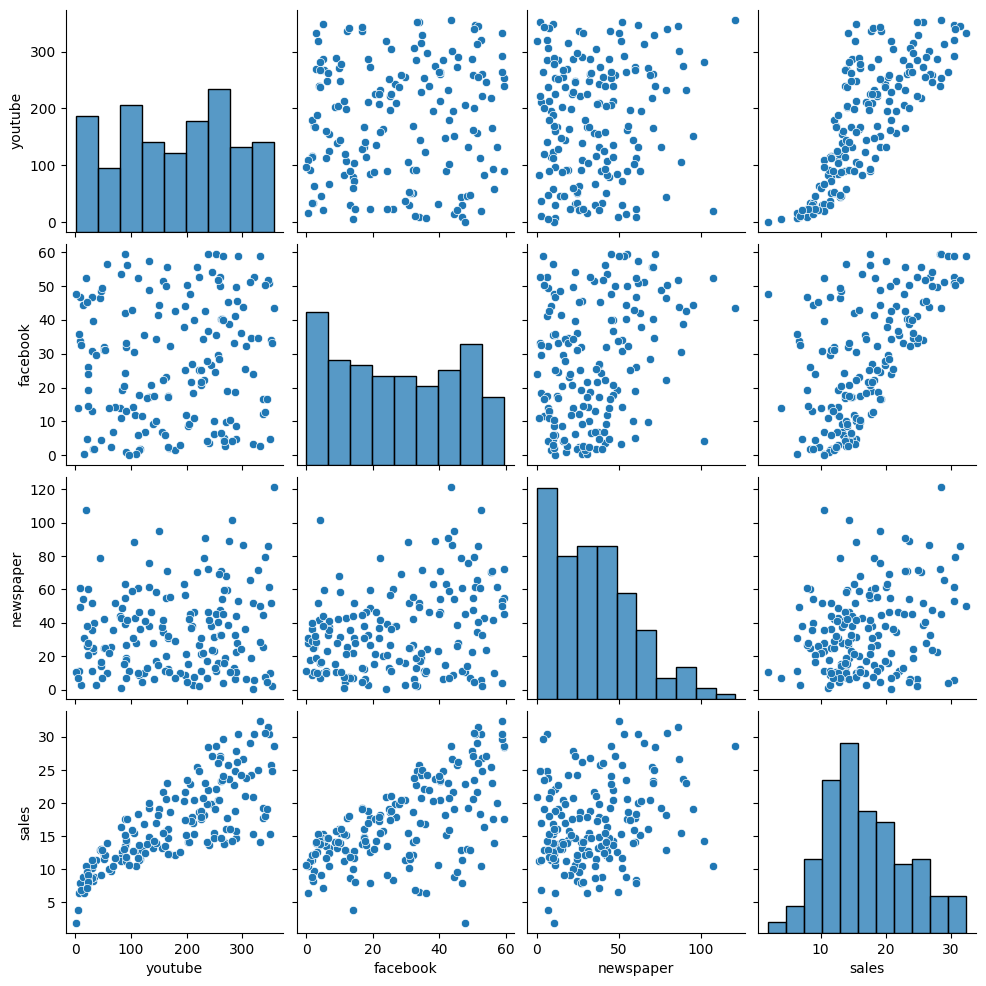

In [31]:
sns.pairplot(df)

<Axes: >

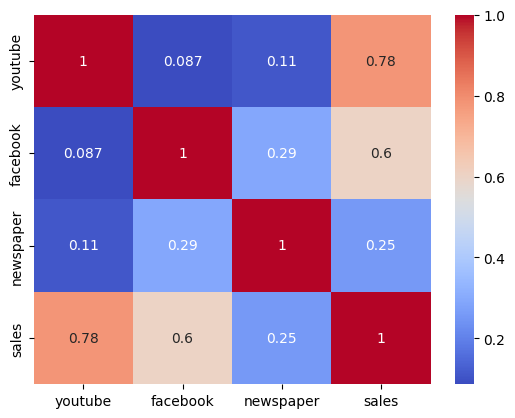

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

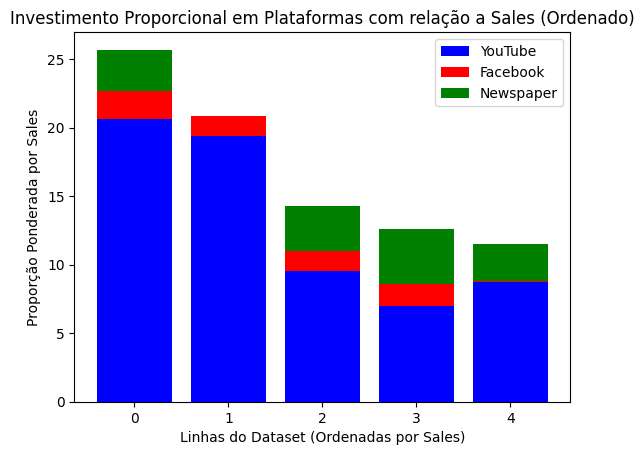

In [36]:
# Proporções ponderadas por sales
df['total_spent'] = df['youtube'] + df['facebook'] + df['newspaper']
df['youtube_prop'] = (df['youtube'] / df['total_spent']) * df['sales']
df['facebook_prop'] = (df['facebook'] / df['total_spent']) * df['sales']
df['newspaper_prop'] = (df['newspaper'] / df['total_spent']) * df['sales']

# Ordenação decrescente pelo valor de sales
df = df.sort_values(by='sales', ascending=False).reset_index(drop=True)

# Gráfico de barras empilhadas proporcionais e sales
x = range(len(df))  # Eixo X para as linhas
plt.bar(x, df['youtube_prop'], label='YouTube', color='blue')
plt.bar(x, df['facebook_prop'], bottom=df['youtube_prop'], label='Facebook', color='red')
plt.bar(x, df['newspaper_prop'], bottom=df['youtube_prop'] + df['facebook_prop'], label='Newspaper', color='green')

# Gráfico da combinação linear do investimento das plataformas
plt.xlabel('Linhas do Dataset (Ordenadas por Sales)')
plt.ylabel('Proporção Ponderada por Sales')
plt.title('Investimento Proporcional em Plataformas com relação a Sales (Ordenado)')
plt.legend()
plt.show()


## **Modelagem**

Para esta etapa, deve-se **construir um modelo** simples de **regressão** que permita a previsão solicitada pela empresa, com base nos dados disponíveis. Para isto, importe as bibliotecas necessárias e carregue os conjuntos de dados para iniciar a sua construção!

<aside>
💡 **Dica:** Utilize as técnicas ensinadas para a criação de um modelo de regressão simples utilizando a biblioteca sklearn.

</aside>

In [39]:
X = df[['youtube', 'facebook', 'newspaper']]
Y = df[["sales"]]

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3, 3)
(2, 3)
(3, 1)
(2, 1)


In [74]:
model = LinearRegression().fit(X_train, Y_train)

## **Calculando predição**

Para concluirmos a demanda solicitada pela empresa, iremos **aplicar o modelo de regressão construído** nas etapas anteriores **para realizar as previsões** de retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade e assim, poderemos apresentá-lo a empresa.

Através dessas previsões, poderemos avaliar o impacto dos diferentes níveis de investimento em marketing nas vendas, auxiliando na tomada de decisões e na definição de estratégias de negócio.

In [70]:
y_pred = model.predict(X_test)

In [64]:
r2 = r2_score(Y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mae}')

R2 Score: 0.9566154936903946
Mean Squared Error: 0.4724572737116033


Text(0, 0.5, 'Sales')

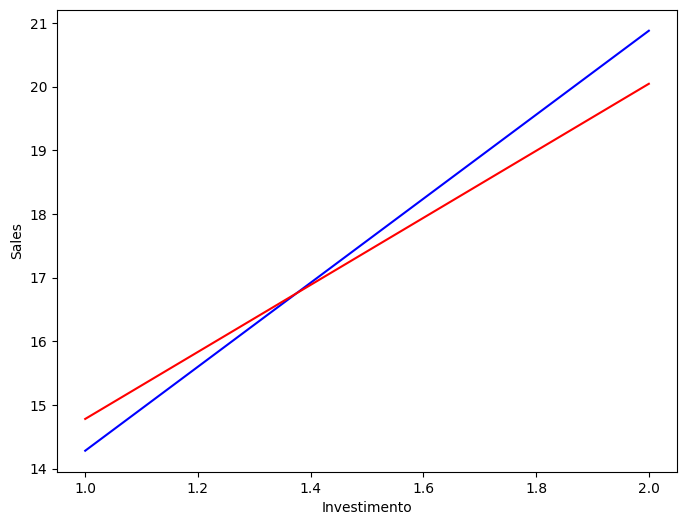

In [76]:
c = [i for i in range(1, len(Y_test)+1, 1)]
fig = plt.figure(figsize=(8,6))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("Investimento")
plt.ylabel("Sales")